macOS용 한글 폰트를 설정합니다...
사용 가능한 폰트 수: 449
AppleGothic 폰트가 성공적으로 설정되었습니다.
1. Creating Bar Chart...


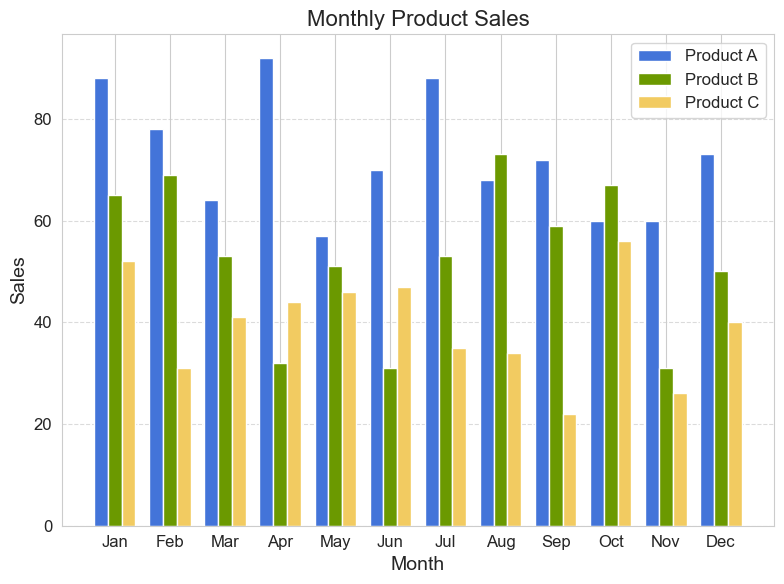

2. Creating Line Chart...


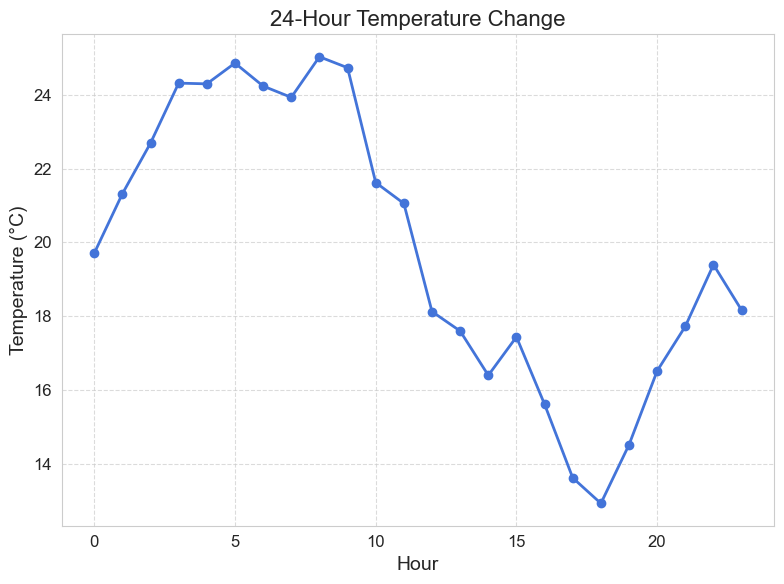

3. Creating Pie Chart...


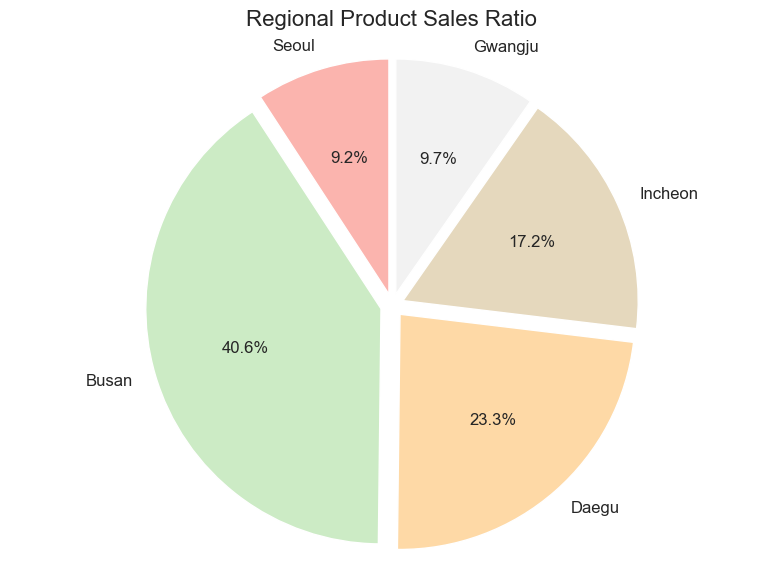

4. Creating Heatmap...


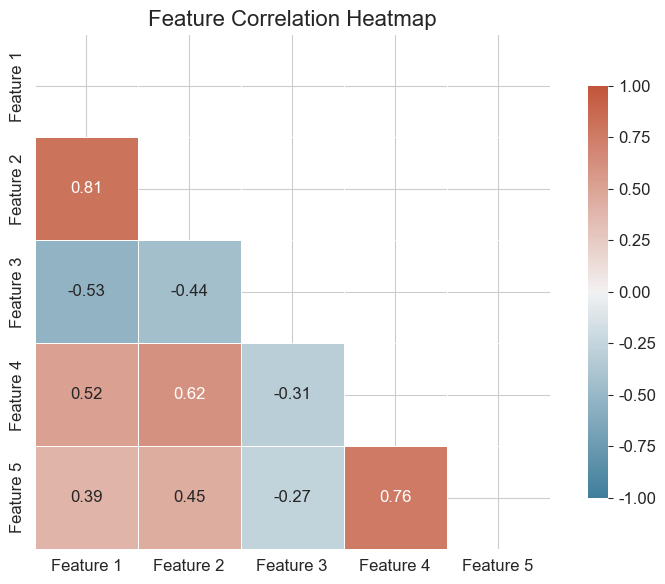

All visualizations completed successfully!
1. Creating Network Graph...


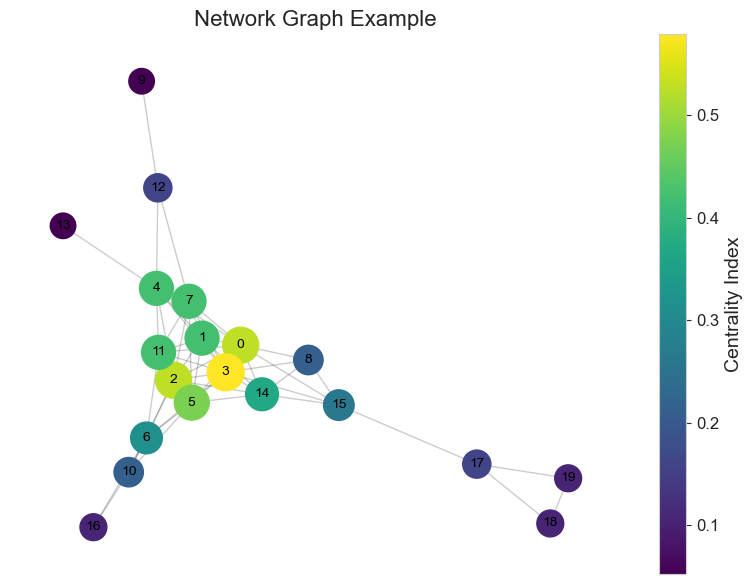

2. Creating 3D Plot...


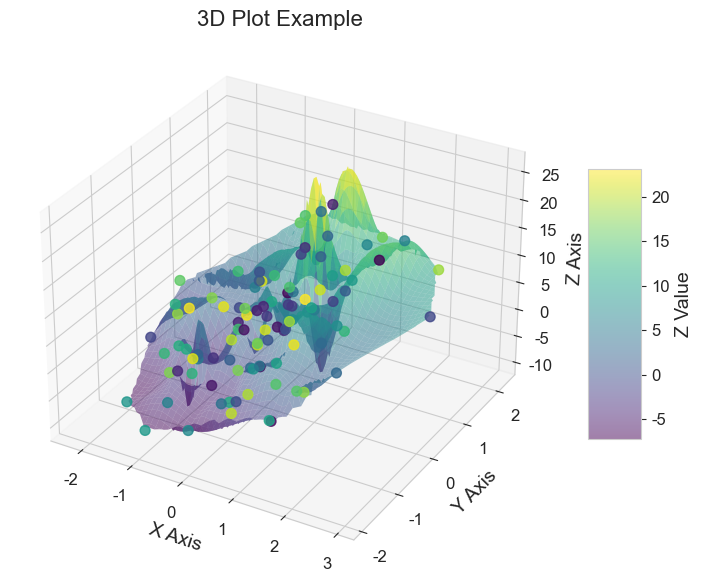

3. Creating Sankey Diagram...
4. Creating Treemap...


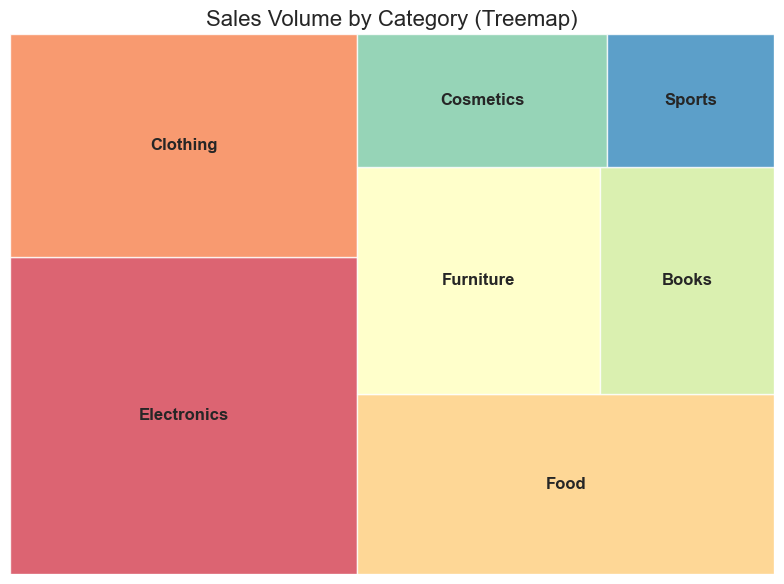

5. Creating Clustermap...


/var/folders/gn/cjjbpm3j7r3d5mp3t2jh7tqc0000gn/T/ipykernel_7486/3386007942.py:429: UserWarning:

The figure layout has changed to tight



<Figure size 800x600 with 0 Axes>

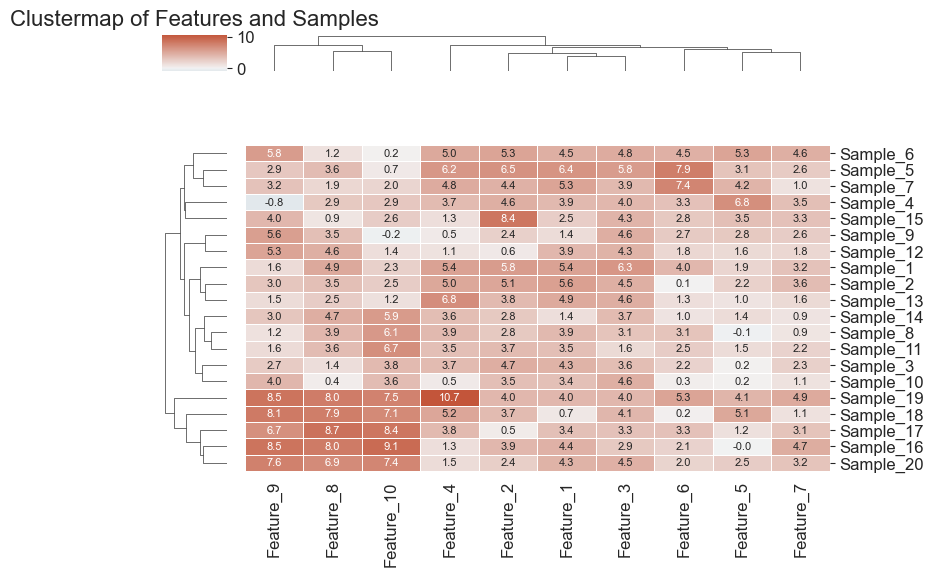

6. Creating Pipeline Plot...


<Figure size 800x600 with 0 Axes>

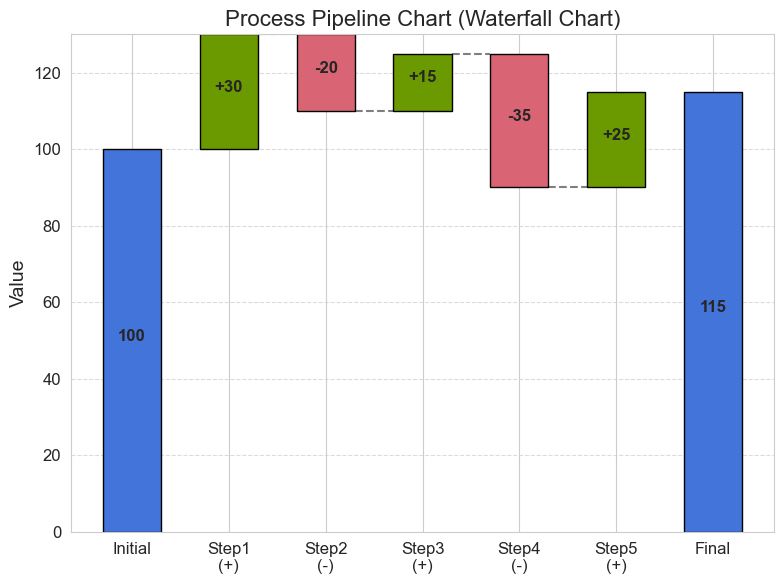

All extended visualizations completed successfully!


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager as fm
import platform
import os
from pathlib import Path
import urllib.request
import subprocess
import sys

# macOS용 한글 폰트 설정
def setup_korean_font_for_mac():
    print("macOS용 한글 폰트를 설정합니다...")
    
    # matplotlib 폰트 매니저 갱신
    fm._load_fontmanager(try_read_cache=False)
    
    # 사용 가능한 폰트 목록 확인
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    print(f"사용 가능한 폰트 수: {len(available_fonts)}")
    
    # macOS에서 기본 제공하는 한글 폰트 설정
    if 'AppleGothic' in available_fonts:
        plt.rcParams['font.family'] = 'AppleGothic'
        print("AppleGothic 폰트가 성공적으로 설정되었습니다.")
    elif 'Apple SD Gothic Neo' in available_fonts:
        plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
        print("Apple SD Gothic Neo 폰트가 성공적으로 설정되었습니다.")
    elif 'Malgun Gothic' in available_fonts:
        plt.rcParams['font.family'] = 'Malgun Gothic'
        print("Malgun Gothic 폰트가 성공적으로 설정되었습니다.")
    else:
        # 나머지 한글 폰트 찾기
        korean_fonts = [f for f in available_fonts if any(k in f.lower() for k in ['gothic', 'gulim', 'batang', '맑은', '나눔', '돋움'])]
        if korean_fonts:
            plt.rcParams['font.family'] = korean_fonts[0]
            print(f"{korean_fonts[0]} 폰트가 설정되었습니다.")
        else:
            print("한글 폰트를 찾을 수 없습니다. 영문 폰트만 사용합니다.")
            plt.rcParams['font.family'] = 'sans-serif'
    
    # 마이너스 기호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False
    return True

# 폰트 설정 적용
setup_korean_font_for_mac()

# 시드 설정
np.random.seed(42)

# 영문 데이터로 변경 (한글이 표시되지 않을 경우 대비)
def generate_test_data():
    # 월별 데이터 (영문으로 변경)
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # 제품별 월간 판매량
    product_a = np.random.randint(50, 100, 12)
    product_b = np.random.randint(30, 80, 12)
    product_c = np.random.randint(20, 60, 12)
    
    # 시간에 따른 온도 변화
    hours = np.arange(24)
    temperature = 20 + 5 * np.sin(np.linspace(0, 2*np.pi, 24)) + np.random.normal(0, 1, 24)
    
    # 지역별 제품 판매 비율 (영문으로 변경)
    regions = ['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju']
    sales_ratio = np.random.dirichlet(np.ones(5)) * 100
    
    # 상관관계 데이터 (영문으로 변경)
    n_samples = 100
    feature1 = np.random.normal(0, 1, n_samples)
    feature2 = feature1 * 0.8 + np.random.normal(0, 0.5, n_samples)
    feature3 = feature1 * -0.5 + np.random.normal(0, 0.7, n_samples)
    feature4 = feature2 * 0.6 + np.random.normal(0, 0.6, n_samples)
    feature5 = feature4 * 0.7 + np.random.normal(0, 0.4, n_samples)
    corr_data = pd.DataFrame({
        'Feature 1': feature1,
        'Feature 2': feature2,
        'Feature 3': feature3,
        'Feature 4': feature4,
        'Feature 5': feature5
    })
    
    return {
        'months': months,
        'product_a': product_a,
        'product_b': product_b,
        'product_c': product_c,
        'hours': hours,
        'temperature': temperature,
        'regions': regions,
        'sales_ratio': sales_ratio,
        'corr_data': corr_data
    }

# 그래프 스타일 설정 함수
def set_graph_style():
    # 폰트 크기 설정
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    
    # 그래프 스타일 설정
    sns.set_style("whitegrid")
    
    # 그래프 색상 설정 (선택사항)
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#4374D9', '#6B9900', '#F2CB61', '#D96574', '#9B59B6'])

# 막대 그래프
def plot_bar_chart(data):
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    set_graph_style()  # 스타일 설정 적용
    
    x = np.arange(len(data['months']))
    width = 0.25
    
    plt.bar(x - width, data['product_a'], width, label='Product A')
    plt.bar(x, data['product_b'], width, label='Product B')
    plt.bar(x + width, data['product_c'], width, label='Product C')
    
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title('Monthly Product Sales')
    plt.xticks(x, data['months'])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('bar_chart.png', dpi=300)
    plt.show()

# 선 그래프
def plot_line_chart(data):
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    set_graph_style()  # 스타일 설정 적용
    
    plt.plot(data['hours'], data['temperature'], marker='o', linestyle='-', linewidth=2, markersize=6)
    
    plt.xlabel('Hour')
    plt.ylabel('Temperature (°C)')
    plt.title('24-Hour Temperature Change')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('line_chart.png', dpi=300)
    plt.show()

# 파이 차트
def plot_pie_chart(data):
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    set_graph_style()  # 스타일 설정 적용
    
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(data['regions'])))
    explode = [0.05] * len(data['regions'])  # 모든 조각을 약간 분리
    
    plt.pie(
        data['sales_ratio'], 
        labels=data['regions'], 
        autopct='%1.1f%%',
        startangle=90, 
        explode=explode,
        colors=colors,
        shadow=False,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1}
    )
    
    plt.title('Regional Product Sales Ratio')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('pie_chart.png', dpi=300)
    plt.show()

# 히트맵
def plot_heatmap(data):
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    set_graph_style()  # 스타일 설정 적용
    
    corr_matrix = data['corr_data'].corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(
        corr_matrix, 
        mask=mask,
        cmap=cmap,
        vmax=1, 
        vmin=-1,
        center=0,
        annot=True, 
        fmt='.2f',
        square=True, 
        linewidths=0.5,
        cbar_kws={"shrink": .8}
    )
    
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('heatmap.png', dpi=300)
    plt.show()

# 모든 그래프 실행 함수
def visualize_all():
    data = generate_test_data()
    
    print("1. Creating Bar Chart...")
    plot_bar_chart(data)
    
    print("2. Creating Line Chart...")
    plot_line_chart(data)
    
    print("3. Creating Pie Chart...")
    plot_pie_chart(data)
    
    print("4. Creating Heatmap...")
    plot_heatmap(data)
    
    print("All visualizations completed successfully!")
# 네트워크 그래프
def plot_network_graph(data):
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    set_graph_style()  # 스타일 설정 적용
    
    # 네트워크 그래프를 위한 데이터 생성
    import networkx as nx
    
    # 랜덤 그래프 생성
    G = nx.random_geometric_graph(20, 0.3)
    
    # 노드 위치 계산
    pos = nx.spring_layout(G, seed=42)
    
    # 노드 크기 및 색상 설정
    node_sizes = [300 + 700 * i for i in nx.degree_centrality(G).values()]
    node_colors = list(nx.degree_centrality(G).values())
    
    # 그래프 그리기
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    nodes = nx.draw_networkx_nodes(G, pos, 
                                  node_size=node_sizes, 
                                  node_color=node_colors, 
                                  cmap=plt.cm.viridis)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    
    plt.colorbar(nodes, label='Centrality Index')
    plt.title('Network Graph Example')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('network_graph.png', dpi=300)
    plt.show()

# 3D 플롯
def plot_3d_graph(data):
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    ax = fig.add_subplot(111, projection='3d')
    
    # 3D 데이터 생성
    n = 100
    x = np.random.normal(0, 1, n)
    y = np.random.normal(0, 1, n)
    z = 3 + 2*x + 4*y + np.random.normal(0, 2, n)
    
    # 컬러맵 설정
    colors = plt.cm.viridis(np.linspace(0, 1, n))
    
    # 3D 산점도 그리기
    scatter = ax.scatter(x, y, z, c=colors, s=50, alpha=0.8)
    
    # 표면 피팅
    from scipy.interpolate import griddata
    xi = np.linspace(min(x), max(x), 100)
    yi = np.linspace(min(y), max(y), 100)
    X, Y = np.meshgrid(xi, yi)
    Z = griddata((x, y), z, (X, Y), method='cubic')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, linewidth=0)
    
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_title('3D Plot Example')
    
    plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Z Value')
    plt.tight_layout()
    plt.savefig('3d_plot.png', dpi=300)
    plt.show()

# 산키 다이어그램
def plot_sankey_diagram(data):
    import plotly.graph_objects as go
    from plotly.offline import plot
    
    # 산키 다이어그램 데이터 생성
    labels = ["Product A", "Product B", "Product C", "Seoul", "Busan", "Daegu", "Incheon", "Gwangju"]
    
    # 소스, 타겟, 값 설정
    source = [0, 0, 0, 1, 1, 1, 2, 2]
    target = [3, 4, 5, 5, 6, 7, 6, 7]
    value = [8, 4, 2, 8, 4, 2, 3, 5]
    
    # 색상 설정
    link_colors = ['rgba(31, 119, 180, 0.4)', 'rgba(255, 127, 14, 0.4)', 
                  'rgba(44, 160, 44, 0.4)', 'rgba(214, 39, 40, 0.4)', 
                  'rgba(148, 103, 189, 0.4)', 'rgba(140, 86, 75, 0.4)', 
                  'rgba(227, 119, 194, 0.4)', 'rgba(127, 127, 127, 0.4)']
    
    # 산키 다이어그램 생성 (4:3 비율로 설정)
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color="blue"
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=link_colors
        )
    )])
    
    fig.update_layout(
        title_text="Product Sales Flow by Region (Sankey Diagram)",
        font_size=12,
        width=800, 
        height=600  # 4:3 비율 (800x600)
    )
    
    # HTML 파일로 저장
    plot(fig, filename='sankey_diagram.html', auto_open=False)
    
    # 이미지로도 저장
    fig.write_image("sankey_diagram.png")
    
    # 플로틀리 그래프 표시 (노트북에서 작동)
    from IPython.display import display, HTML
    display(HTML("<p>Sankey diagram saved as 'sankey_diagram.html' and 'sankey_diagram.png'.</p>"))

# 트리맵
def plot_treemap(data):
    import squarify
    
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    set_graph_style()  # 스타일 설정 적용
    
    # 트리맵 데이터 생성
    categories = ['Electronics', 'Clothing', 'Food', 'Furniture', 'Books', 'Cosmetics', 'Sports']
    sizes = [500, 350, 340, 250, 180, 150, 100]
    colors = plt.cm.Spectral(np.linspace(0.1, 0.9, len(categories)))
    
    # 트리맵 그리기
    squarify.plot(sizes=sizes, label=categories, color=colors, alpha=0.8, 
                 text_kwargs={'fontsize':12, 'weight':'bold'})
    
    plt.axis('off')
    plt.title('Sales Volume by Category (Treemap)', fontsize=16)
    plt.tight_layout()
    plt.savefig('treemap.png', dpi=300)
    plt.show()

# 클러스터맵
def plot_clustermap(data):
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    
    # 클러스터맵을 위한 데이터 생성
    np.random.seed(42)
    num_samples = 20
    num_features = 10
    
    # 특성 이름 생성
    feature_names = [f'Feature_{i+1}' for i in range(num_features)]
    sample_names = [f'Sample_{i+1}' for i in range(num_samples)]
    
    # 데이터 생성 (상관관계가 있는 데이터)
    data_matrix = np.zeros((num_samples, num_features))
    
    # 첫 번째 그룹 (특성 0-3이 유사)
    for i in range(0, 8):
        base = np.random.normal(5, 1)
        for j in range(0, 4):
            data_matrix[i, j] = base + np.random.normal(0, 0.5)
    
    # 두 번째 그룹 (특성 4-6이 유사)
    for i in range(8, 15):
        base = np.random.normal(2, 1)
        for j in range(4, 7):
            data_matrix[i, j] = base + np.random.normal(0, 0.5)
    
    # 세 번째 그룹 (특성 7-9가 유사)
    for i in range(15, 20):
        base = np.random.normal(8, 1)
        for j in range(7, 10):
            data_matrix[i, j] = base + np.random.normal(0, 0.5)
    
    # 나머지 값들은 랜덤하게 채우기
    for i in range(num_samples):
        for j in range(num_features):
            if data_matrix[i, j] == 0:
                data_matrix[i, j] = np.random.normal(3, 2)
    
    # 데이터프레임 생성
    df = pd.DataFrame(data_matrix, index=sample_names, columns=feature_names)
    
    # 클러스터맵 그리기 (4:3 비율로 설정)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    cluster = sns.clustermap(
        df, 
        cmap=cmap,
        center=0,
        figsize=(8, 6),  # 4:3 비율로 변경
        dendrogram_ratio=0.1,
        cbar_pos=(0.02, 0.8, 0.05, 0.18),
        linewidths=0.5,
        annot=True,
        fmt='.1f',
        annot_kws={"size": 8}
    )
    
    plt.title('Clustermap of Features and Samples', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig('clustermap.png', dpi=300)
    plt.show()

# 파이프라인 플롯 (워터폴 차트)
def plot_pipeline(data):
    plt.figure(figsize=(8, 6))  # 4:3 비율로 변경
    set_graph_style()  # 스타일 설정 적용
    
    # 파이프라인/워터폴 차트 데이터
    categories = ['Initial', 'Step1\n(+)', 'Step2\n(-)', 'Step3\n(+)', 'Step4\n(-)', 'Step5\n(+)', 'Final']
    values = [100, 30, -20, 15, -35, 25, 0]  # 마지막 0은 자동 계산됨
    
    # 누적 값 계산
    cumulative = [100]
    for i in range(1, len(values)-1):
        cumulative.append(cumulative[-1] + values[i])
    values[-1] = cumulative[-1]  # 최종값 설정
    
    # 색상 설정
    colors = ['#4374D9', '#6B9900', '#D96574', '#6B9900', '#D96574', '#6B9900', '#4374D9']
    
    # 증가/감소 표시
    edgecolors = ['black'] * len(categories)
    
    # 워터폴 차트 그리기
    fig, ax = plt.subplots(figsize=(8, 6))  # 4:3 비율로 변경
    
    # 초기값과 최종값 막대 그리기
    ax.bar(0, values[0], color=colors[0], edgecolor=edgecolors[0], width=0.6)
    ax.bar(len(categories)-1, values[-1], color=colors[-1], edgecolor=edgecolors[-1], width=0.6)
    
    # 중간 단계 그리기
    for i in range(1, len(categories)-1):
        # 증가 또는 감소 막대 그리기
        ax.bar(i, values[i], bottom=cumulative[i-1] if values[i] < 0 else cumulative[i-1], 
              color=colors[i], edgecolor=edgecolors[i], width=0.6)
        
        # 연결선 그리기
        if i < len(categories)-2:
            ax.plot([i+0.3, i+0.7], [cumulative[i], cumulative[i]], 'k--', alpha=0.5)
    
    # 축 설정
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories)
    ax.set_ylabel('Value')
    ax.set_title('Process Pipeline Chart (Waterfall Chart)')
    
    # 값 표시
    for i, v in enumerate(values):
        if i == 0 or i == len(values)-1:
            ax.text(i, v/2, str(v), ha='center', fontweight='bold')
        else:
            sign = '+' if v > 0 else ''
            ax.text(i, cumulative[i-1] + v/2 if v > 0 else cumulative[i-1] + v/2, f"{sign}{v}", 
                   ha='center', fontweight='bold')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('pipeline_chart.png', dpi=300)
    plt.show()

# 확장된 시각화 함수
def visualize_extended():
    data = generate_test_data()
    
    print("1. Creating Network Graph...")
    plot_network_graph(data)
    
    print("2. Creating 3D Plot...")
    plot_3d_graph(data)
    
    print("3. Creating Sankey Diagram...")
    # plot_sankey_diagram(data)
    
    print("4. Creating Treemap...")
    plot_treemap(data)
    
    print("5. Creating Clustermap...")
    plot_clustermap(data)
    
    print("6. Creating Pipeline Plot...")
    plot_pipeline(data)
    
    print("All extended visualizations completed successfully!")



if __name__ == "__main__":
    visualize_all() 
    visualize_extended()